In [ ]:
%pip install pandas
%pip install scikit.learn
%pip install joblib

In [1]:
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, mean_absolute_error

In [2]:
df = pd.read_csv('./diamonds.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)

cut_dict = {
  "Fair" : 0,
  "Good" : 1,
  "Very Good" : 2,
  "Premium" : 3,
  "Ideal" : 4
}

color_dict = {
  "D" : 6,
  "E" : 5,
  "F" : 4,
  "G" : 3,
  "H" : 2,
  "I" : 1,
  "J" : 0
}

clarity_dict = {
  "I1" : 0,
  "SI2" : 1,
  "SI1" : 2,
  "VS2" : 3,
  "VS1" : 4,
  "VVS2" : 5,
  "VVS1" : 6,
  "IF" : 7
}
df = df.replace(cut_dict).replace(color_dict).replace(clarity_dict)
print(df)

       carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    4      5        1   61.5   55.0    326  3.95  3.98  2.43
1       0.21    3      5        2   59.8   61.0    326  3.89  3.84  2.31
2       0.23    1      5        4   56.9   65.0    327  4.05  4.07  2.31
3       0.29    3      1        3   62.4   58.0    334  4.20  4.23  2.63
4       0.31    1      0        1   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53935   0.72    4      6        2   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72    1      6        2   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70    2      6        2   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    3      2        1   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    4      6        1   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


[-1.6499999999999773, -192.13999999999987, 35.01999999999998, 91.77999999999997, -2852.120000000001, -1023.3400000000001, -26.940000000000055, -107.86666666666679, 5.480000000000018, -758.1300000000001, 7.9500000000000455, -115.80999999999949, -229.4000000000001, 170.11000000000013, -489.28999999999996, -932.4099999999999, -670.5799999999999, 43.82999999999993, -886.6399999999994, -5.039999999999964, 719.4900000000016, 85.49000000000001, 14.629999999999995, 29.00999999999999, 153.65999999999985, -184.77999999999997, 23.950000000000045, -453.4500000000007, -886.4300000000003, -6.569999999999993, -76.60999999999967, -206.73000000000002, -74.54999999999927, 8.940000000000055, 118.51999999999998, -45.079999999999984, 18.66999999999996, -1.0199999999999818, 93.26999999999998, 975.7700000000004, -93.32000000000016, 234.6400000000001, 10.059999999999945, -1374.2000000000007, -107.01999999999998, -36.950000000000045, 296.09000000000015, 115.47999999999956, 1053.9399999999987, -517.260000000000

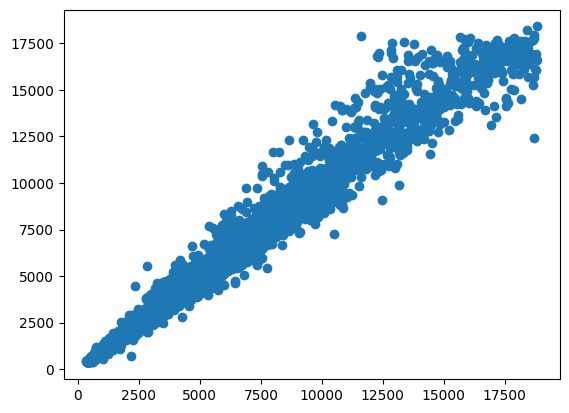

In [12]:
Y = df['price']
X = df.drop('price', axis = 1)

# scores = cross_val_score(RandomForestRegressor(n_jobs=-1), X, Y, cv = 8)

# print(scores)
# pca = PCA(n_components = 8)
# pca.fit(X)
# X = pca.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

model = RandomForestRegressor(n_jobs=-1)
# model = GridSearchCV(
#   RandomForestRegressor(),
#   {
#     'criterion' : [ 'gini', 'entropy' ],
#     'min_samples_split' : range(2, 20)
#   },
#   n_jobs = -1
# )

model.fit(X_train, Y_train)
# print(model.best_params_)
# model = model.best_estimator_
dump(model, 'model_random_forest.pkl')

# predictions = model.predict(X_train)
# print(mean_absolute_error(Y_train, predictions))
# ConfusionMatrixDisplay.from_predictions(Y_train, predictions)
# plt.show()

# predictions = model.predict(X_test)
# print(mean_absolute_error(Y_test, predictions))
# ConfusionMatrixDisplay.from_predictions(Y_test, predictions)
# plt.show()

Y_pred = model.predict(X_test)
distances = [ti - pi for ti, pi in zip(Y_test, Y_pred)]
print(distances)
plt.scatter(Y_test, Y_pred)
# plt.plot(Y_pred)
plt.show()